# `plot()` method

In [3]:
import pandas as pd

# Read in file
df = pd.read_csv('data/wetlands_seasonal_bird_diversity.csv')

# Check the first 5 rows
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


<Axes: >

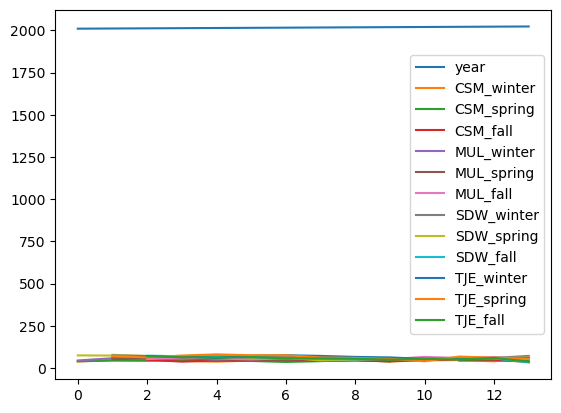

In [2]:
# Default plot(): one line plot per column with numeric data
df.plot()

# Line plots 
We can make a line plot of one column against another by following the general syntax:
`df.plot(x='x_values_column', y='y_values_column')`

In [ ]:
# Birds species registered during winter at CSM yearly
df.plot(x='year', y='CSM_winter')

In [ ]:
df.plot(x='year', 
        y='CSM_winter',
        title='Bird species registered during winter at Carpinteria Salt Marsh',
        xlabel='Year',
        ylabel='Number of bird species',
        color='green',
        legend=False
        )

# Check #1: 
- Plot a graph of the spring bird surveys at Mugu Lagoon with respect to the years. Include some basic customization.
- Use the isna() method for pandas.Series and row selection to select the rows in which Mugu Lagoon has NAs during the spring survey.

<Axes: title={'center': 'Bird species registered during spring at Mugu Lagoon'}, xlabel='Year', ylabel='Number of bird species'>

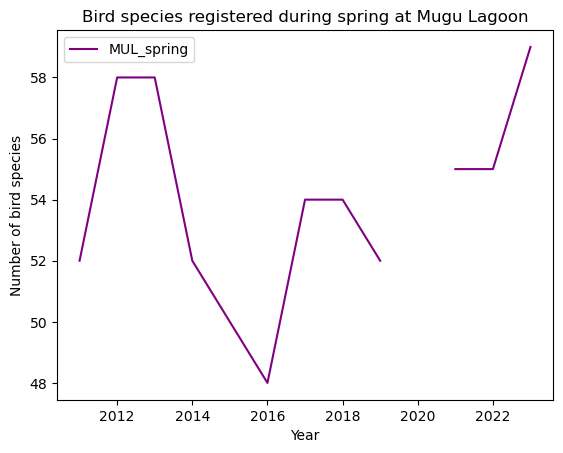

In [7]:
df.plot(x='year', 
        y='MUL_spring',
        title='Bird species registered during spring at Mugu Lagoon',
        xlabel='Year',
        ylabel='Number of bird species',
        color='purple',
        legend=True
        )

In [9]:
print(df['MUL_spring'].isna())
print(df[df['MUL_spring'].isna()])

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
Name: MUL_spring, dtype: bool
    year  CSM_winter  CSM_spring  CSM_fall  MUL_winter  MUL_spring  MUL_fall  \
0   2010        39.0        40.0      50.0        45.0         NaN      61.0   
10  2020        46.0         NaN      47.0        56.0         NaN      66.0   

    SDW_winter  SDW_spring  SDW_fall  TJE_winter  TJE_spring  TJE_fall  
0          NaN        75.0      85.0         NaN         NaN      81.0  
10        57.0         NaN      58.0        54.0        40.0      54.0  


# Multiple Line Plots

In [ ]:
df.plot(x='year', 
        y=['TJE_spring', 'TJE_fall'],
        title = 'Seasonal bird surveys at Tijuana Estuary',
        xlabel='Year',
        ylabel='Number of bird species',        
        color = {'TJE_spring':'#F48FB1',
                 'TJE_fall': '#AB47BC'
                 }
        )

In [ ]:
df.plot(x='year', 
        y=['TJE_spring', 'TJE_fall'],
        title = 'Seasonal bird surveys at Tijuana Estuary',
        xlabel='Year',
        ylabel='Number of bird species',        
        color = {'TJE_spring':'#F48FB1',
                 'TJE_fall': '#AB47BC'
                 },
        subplots=True
        )

# Updating the index

In [ ]:
df = df.set_index(new_index)

In [ ]:
# Set `column_name` column in df as the new index (reassignment)
df = df.set_index('column_name')

In [ ]:
# Set `column_name` column in df as the new index (modify df in-place)
df.set_index('column_name', inplace=True)

In [ ]:
# Update index to be the year column
df = df.set_index('year')
df.head()

In [ ]:
# Simple plot of Carpinteria Salt Marsh winter surveys
df.plot(y='CSM_winter')

In [ ]:
df = df.reset_index()
df.head()

# Checkin 2

## Without running the code, give a step-by-step breakdown of what this code is doing:

`df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()`

1. Call the dataframe `df.`
2. Set the index of the dataframe to the 'year' column.
3. Access all rows with columns by labels
4. Create a plot with all the columns in the subset

## Is this code modifying the data frame df? Why or why not?

This code is not modifying the original dataframe because the operations were not assigned back into the df. The method set_index() created a new dataframe, technically, but has not been saved into a new object. 

## Run the code and examine the graph. Review the data description. Do we have all the necessary information to make sure it makes sense to directly compare the surveys at these different sites?

<Axes: xlabel='year'>

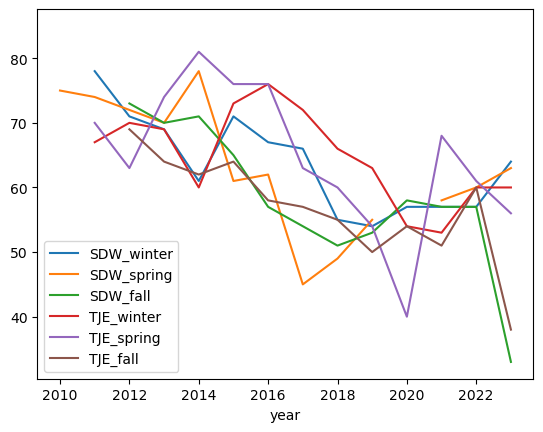

In [5]:
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()

No. There's periods where data was not collected for each season. It's hard to compare different seasons in the same plot. Normalization of the data distribution could make the plot more interpretable. 

# Method Chaining

In [11]:
# Read in data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Check-in 3

### Select the bill_length_mm and bill_depth_mm columns in the penguins dataframe and then update the kind parameter to box to make boxplots of the bill length and bill depth.

<Axes: title={'center': 'Penguin bill lengths'}, ylabel='Bill length (mm)'>

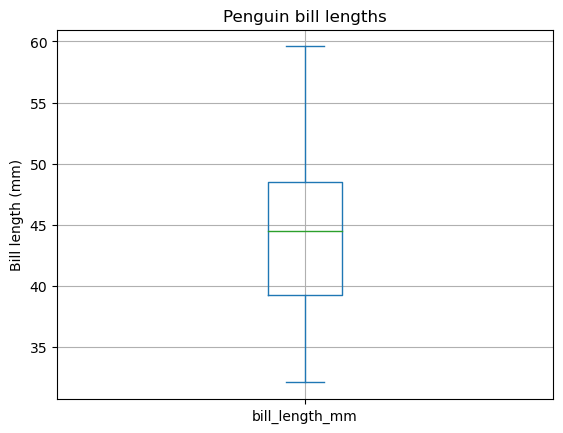

In [12]:
penguins['bill_length_mm'].plot(kind='box',
                                title='Penguin bill lengths',
                                ylabel='Bill length (mm)',
                                grid=True)

<Axes: title={'center': 'Penguin bill depths'}, xlabel='Bill length (mm)'>

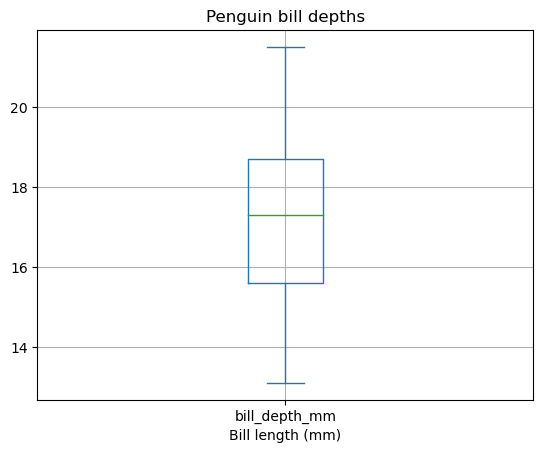

In [10]:
female_gentoos = penguins[(penguins['sex'] == 'femalepenguins['bill_depth_mm'].plot(kind='box',
                              title = 'Penguin bill depths',
                              ylabel='Bill depth (mm)',
                              grid=True)

### Create a simple histogram of the flipper length of female gentoo penguins.

<Axes: ylabel='Frequency'>

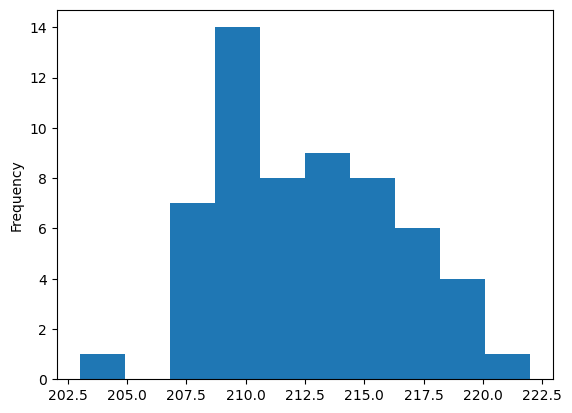

In [ ]:
penguins.loc[(penguins['sex'] == 'female') & (penguins['species'] == 'Gentoo'),'flipper_length_mm'].plot(kind='hist')